<br><br>
<font size = '6'><b>Control with Matlab</b></font>

<table style="border-style: hidden; border-collapse: collapse;" width = "80%"> 
    <tr style="border-style: hidden; border-collapse: collapse;">
        <td width = 50% style="border-style: hidden; border-collapse: collapse;">
             
        </td>
        <td width = 30%>
            Prof. Seungchul Lee<br>iSystems (http://isystems.unist.ac.kr/)<br>UNIST
        </td>
    </tr>
</table>


Table of Contents
<div id="toc"></div>

# 1. PID Control

- 1.5 Control Design Basics | Control of Mobile Robots

In [1]:
%%html
<center><iframe src="https://www.youtube.com/embed/DJuo9kLdr4M?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

For the given car model

$$ \dot{x} = \frac{c}{m}u \quad \text{for the velocity of a car,} \,\, x $$

In a bloack diagram

<img src="./image_files/car_model.png" width=300/>

in a Laplace transform
<img src="./image_files/car_model_Laplace.png" width=300/>

We want to achieve
$$ x \rightarrow r \quad \text{as} \quad t \rightarrow \infty \,\,(e=r-x \rightarrow 0) $$

## Attempt 2: P Regulator

$$u = ke$$

- small error yeilds small control signals

- nice and smooth

- so-called proportional regulation (P regulator)

<img src="./image_files/car_model_Kp.png" width=400/>

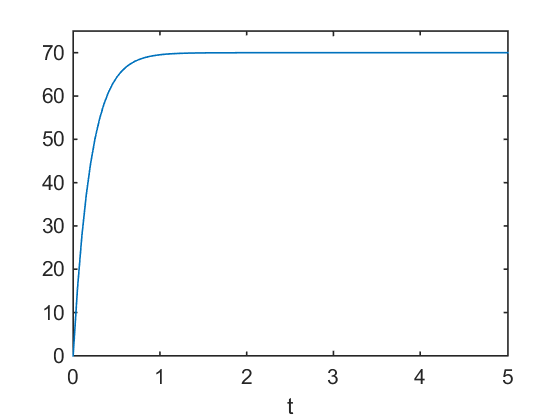

In [2]:
c = 1;
m = 1;

G = tf(c/m,[1 0]);

k = 5;
C = k;

Gcl = feedback(C*G,1,-1);

t = linspace(0,5,100);
r = 70*ones(size(t));   % reference

x0 = 0;
[y,tout] = lsim(Gcl,r,t,x0);
plot(tout,y), xlabel('t'), ylim([0,75])

## What if the true system is:

$$ 
\dot{x} = \frac{c}{m}u - \gamma x$$

<br>
<img src="./image_files/true_car_Kp.png" width=400/>

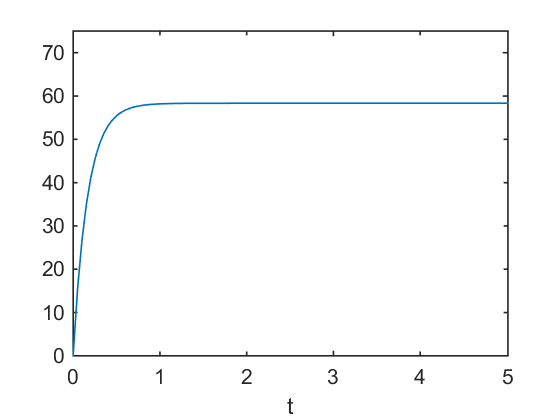

In [3]:
gamma = 1;
Gtr = tf(c/m,[1 gamma]);
C = k;

Gcl = feedback(C*Gtr,1,-1);

x0 = 0;
t = linspace(0,5,100);
r = 70*ones(size(t));
[y,tout] = lsim(Gcl,r,t,x0);
plot(tout,y), xlabel('t'), ylim([0,75])

## Attempt 3
- 1.6 Performance Objectives | Control of Mobile Robots

- 1.7 PID Control | Control of Mobile Robots

In [2]:
%%html
<center><iframe src="https://www.youtube.com/embed/cQhqx65kLfM?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

In [3]:
%%html
<center><iframe src="https://www.youtube.com/embed/Mk1ygHj4zxw?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

$$u = ke + \gamma \frac{m}{c}x$$

However, all of sudden we have to know all these physical parameters that we typically do not know - not robust !!!

## Attempt 4: PI Regulators
- Stability (BIBO)
- Tracking
- Robustness

$$ u(t) = k_P \, e(t) + k_I \int_0^t e(\tau)d\tau $$

<img src="./image_files/true_car_Kp_Ki.png" width=400/>

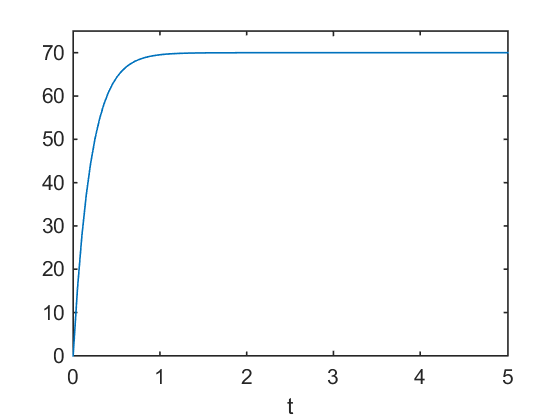

In [6]:
Gtr = tf(c/m,[1 gamma]);
kP = 5;
kI = 5;
C = tf([kP kI],[1 0]);

Gcl = feedback(C*Gtr,1,-1);

x0 = 0;
t = linspace(0,5,100);
r = 70*ones(size(t));
[y,tout] = lsim(Gcl,r,t,x0);
plot(tout,y), xlabel('t'), ylim([0,75])

---
# 2. Root Locus
- The Root Locus Method by Brian Douglas

- from [umich control](http://ctms.engin.umich.edu/CTMS/index.php?example=Introduction&section=ControlRootLocus)

In [4]:
%%html
<center><iframe src="https://www.youtube.com/embed/CRvVDoQJjYI?list=PLUMWjy5jgHK1NC52DXXrriwihVrYZKqjk" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

<img src = "./image_files/RootLocusTutorial_ClosedLoopPoles_BlockDiagram.png" , width = 500>

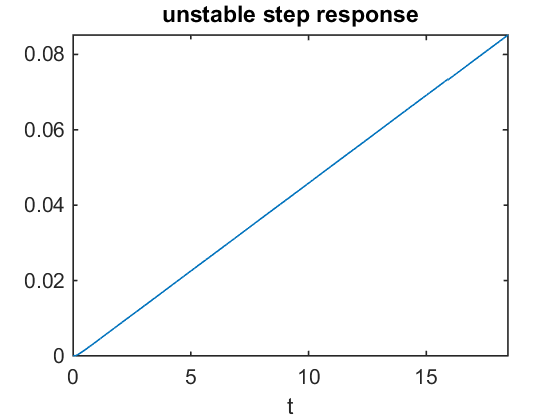

In [8]:
s = tf('s');
sys = (s + 7)/(s*(s + 5)*(s + 15)*(s + 20));
[y,tout] = step(sys); % unstable
plot(tout,y), axis tight, xlabel('t'), title('unstable step response')

In [9]:
pole(sys)
G = sys;

ans =

         0
  -20.0000
  -15.0000
   -5.0000

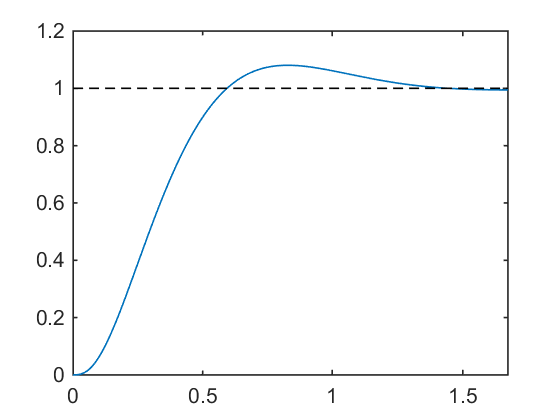

k =

   800


Gcl =
 
               800 s + 5600
  --------------------------------------
  s^4 + 40 s^3 + 475 s^2 + 2300 s + 5600
 
Continuous-time transfer function.


ans =

 -23.5466 + 0.0000i
 -10.1226 + 0.0000i
  -3.1654 + 3.6708i
  -3.1654 - 3.6708i

In [10]:
%k = 10;
k = 800

Gcl = feedback(k*G,1,-1)
pole(Gcl)
[y,tout] = step(Gcl);
plot(tout,y,tout,ones(size(tout)),'k--'), axis tight, ylim([0,1.2])

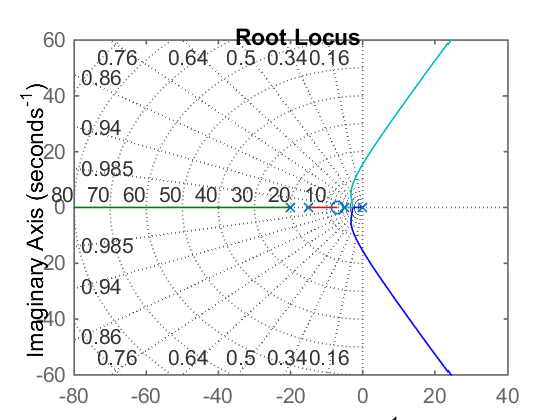

In [11]:
rlocus(G), grid

In [12]:
help rlocus

RLOCUS  Evans root locus.
 
    RLOCUS(SYS) computes and plots the root locus of the single-input,
    single-output LTI model SYS. The root locus plot is used to analyze 
    the negative feedback loop
 
                      +-----+
          ---->O----->| SYS |----+---->
              -|      +-----+    |
               |                 |
               |       +---+     |
               +-------| K |<----+
                       +---+
 
    and shows the trajectories of the closed-loop poles when the feedback 
    gain K varies from 0 to Inf.  RLOCUS automatically generates a set of 
    positive gain values that produce a smooth plot.  
 
    RLOCUS(SYS,K) uses a user-specified vector K of gain values.
 
    RLOCUS(SYS1,SYS2,...) draws the root loci of several models SYS1,SYS2,... 
    on a single plot. You can specify a color, line style, and marker for 
    each model, for example:
       rlocus(sys1,'r',sys2,'y:',sys3,'gx').
 
    [R,K] = RLOCUS(SYS) or R = RLOCUS(SYS,K) retur

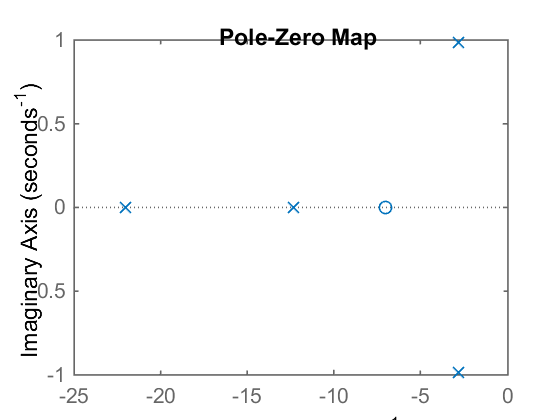

sys_cl =
 
               350 s + 2450
  --------------------------------------
  s^4 + 40 s^3 + 475 s^2 + 1850 s + 2450
 
Continuous-time transfer function.

In [13]:
K = 350;
sys_cl = feedback(K*sys,1,-1) % negative feedback

pzmap(sys_cl)

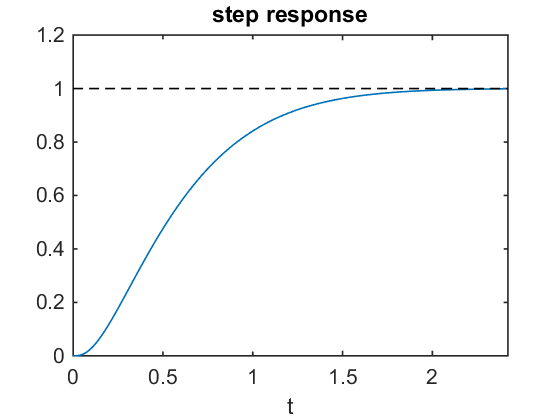

In [14]:
[y,tout] = step(sys_cl); 
plot(tout,y,tout,ones(size(tout)),'k--'), 
axis tight, ylim([0,1.2]), xlabel('t'), title('step response')

# 3. State Space Representation

- from 3.1 A Simple Robot | Control of Mobile Robots

- from 3.2 State Space Models | Control of Mobile Robots

In [5]:
%%html
<center><iframe src="https://www.youtube.com/embed/kQNUpNh6nBc?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

In [6]:
%%html
<center><iframe src="https://www.youtube.com/embed/W6AUOyj5bFA?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

__Controlling a point mass__

Given a point mass on a line whose acceleration is directly controlled:
$$ \ddot{p} = u $$

want to write this on a compact/general form

$$
\begin{align*}
\dot{x}_1 &= x_2\\
\dot{x}_2 &= u\\
\end{align*}
$$

on a state space form

$$
\begin{align*}
\dot{x} &= 
\left[ {\begin{matrix}
   \dot{x}_1 \\
   \dot{x}_2 \\   
  \end{matrix} } \right] =
\left[ {\begin{matrix}
   0 & 1 \\
   0 & 0 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   0 \\
   1 \\   
\end{array} } \right]u\\
\\y & = p=x_1=
\left[ {\begin{matrix}
   1 & 0    
\end{matrix} } \right]  
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right]  
\end{align*}
$$

<img src="./image_files/ss_diag.png" width=400/>

## 3.1. The car model

If we care about/can measure the velocity:

$$ A = -\gamma, \qquad B = \frac{c}{m}, \qquad C = 1    $$

If we care about/can measure the position we have the same general equation with different matrices:


$$
A = 
\left[ {\begin{matrix}
   0 & 1 \\
   0 & -\gamma \\   
\end{matrix} } \right], \qquad
B = 
\left[ {\begin{matrix}
   0 \\
   \frac{c}{m} \\   
\end{matrix} } \right], \qquad
C = \left[ {\begin{matrix}
   1 \quad 0 \\     
\end{matrix} } \right]
$$

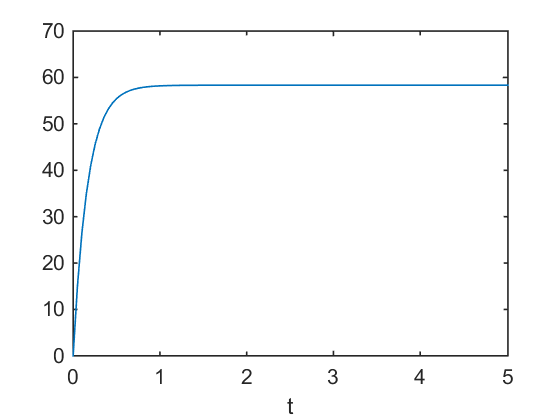

In [17]:
% system in ss
c = 1;
m = 1;
gamma = 1;

A = -gamma;
B = c/m;
C = 1;
D = 0;

Gss = ss(A,B,C,D);

% P controller
k = 5;
C = k;

% close loop
Gcl = feedback(C*Gss,1,-1);

x0 = 0;
t = linspace(0,5,100);
r = 70*ones(size(t));
[y,tout] = lsim(Gcl,r,t,x0);
plot(tout,y), xlabel('t'), ylim([0,70])

## 3.2. Back to the World's Simplest Robot (Output Feedback)

- from 3.7 Output Feedback | Control of Mobile Robots

In [7]:
%%html
<center><iframe src="https://www.youtube.com/embed/HmqOnsRH73w?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

$$u = -y$$

<img src="./image_files/outputfeedback.png" width=400/>

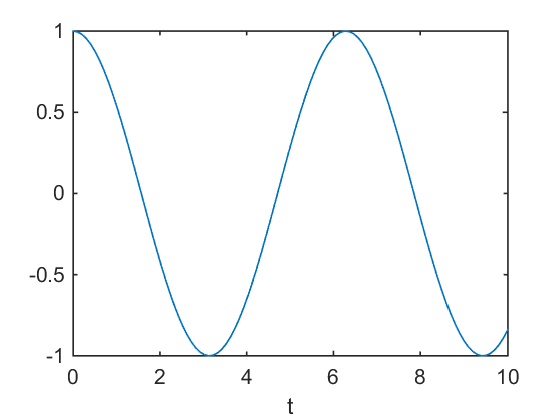

In [19]:
% to move towards the origin
% u = -y

A = [0 1;0 0];
B = [0 1]';
C = [1 0];
D = 0;
G = ss(A,B,C,D);

K = 1;
Gcl = feedback(G,K,-1);
x0 = [1 0]';
t = linspace(0,10,100);
r = zeros(size(t));
[y,tout] = lsim(Gcl,r,t,x0);
plot(tout,y), xlabel('t')

In [20]:
eig(Gcl)

ans =

   0.0000 + 1.0000i
   0.0000 - 1.0000i

# 4. State Feedback

- from 3.8 State Feedback | Control of Mobile Robots

In [8]:
%%html
<center><iframe src="https://www.youtube.com/embed/yl5IiJOYQps?list=PLciAw3uhNCiD3dkLTPJgHoMnsu8XgCt1m" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

<img src="./image_files/statefeedback.gif" width = 400>

To move forwards origin, $R = 0$

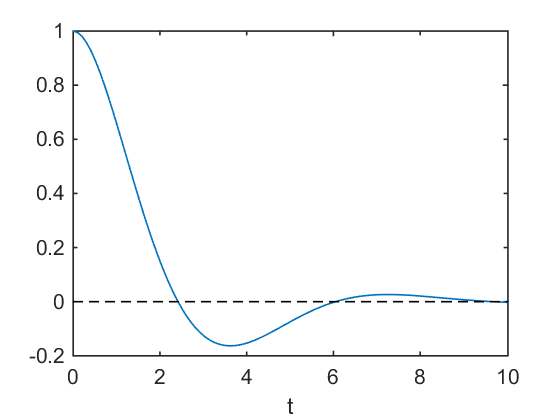

In [22]:
A = [0 1;0 0];
B = [0 1]';
C = [1 0];
D = 0;
G = ss(A,B,C,D);

k1 = 1;
k2 = 1;
K = [k1 k2];
Gcl = ss(A-B*K,B,C,D);

x0 = [1 0]';
t = linspace(0,10,100);
r = zeros(size(t));
[y,tout] = lsim(Gcl,r,t,x0);
plot(tout,y,tout,zeros(size(tout)),'k--'), xlabel('t')

In [23]:
eig(Gcl)

ans =

  -0.5000 + 0.8660i
  -0.5000 - 0.8660i

Eigenvalues Matter 
- It is clear that some eigenvalues are better than others. Some cause oscillations, some make the system respond too slowly,
and so forth ...
- In the next module we will see how to select eigenvalues and how to pick control laws based on the output rather than the state.

## 4.1. Pole Placement
- from 4.1 Stabilizing the Point Mass | Control of Mobile Robots

- from 4.2 Pole Placement | Control of Mobile Robots

In [9]:
%%html
<center><iframe src="https://www.youtube.com/embed/S4WZTmEnbrY?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

In [10]:
%%html
<center><iframe src="https://www.youtube.com/embed/5tWhOK8Klo0?list=PLp8ijpvp8iCvFDYdcXqqYU5Ibl_aOqwjr" 
width="560" height="315" frameborder="0" allowfullscreen></iframe></center>

back to the point-mass, again
 
 $$ u = -Kx \rightarrow \dot{x}=(A-BK)x $$
 
 $$
\begin{align*}
A-BK = 
\left[ {\begin{matrix}
   0 & 1 \\
   0 & 0 \\   
  \end{matrix} } \right]-
\left[ {\begin{array}{cc}
   0 \\
   1 \\   
\end{array} } \right]
\left[ {\begin{array}{cc}
   k_1 \,\, k_2   
\end{array} } \right]&=
\left[ {\begin{matrix}
   0 & 1 \\
   -k_1 & -k_2 \\   
\end{matrix} } \right]
\end{align*}
$$

$$
\left| {
\begin{matrix}
   0 & 1 \\
   -k_1 & -k_2 \\   
\end{matrix} } \right|=
\lambda^2 + \lambda k_2 + k_1
$$

Desired Eigenvalues: let's pick both eigenvalues at -1

$$ (\lambda+1)(\lambda+1) = \lambda^2 + 2 \lambda + 1 $$

$$k_1 = 2, k_2 = 1 $$

<img src="./image_files/state_feedback_ukx.png" width=350/>

Pick the control gains such that the eigenvalues (poles) of the closed loop system match the desired eigenvalues

Questions
- Is this always possible? (No)
- How should we pick the eigenvalues? (Mix of art and science)

$$
\begin{align*}
\dot{x} &= 
\left[ {\begin{matrix}
   2 & 0 \\
   1 & 1 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   1 \\
   1 \\   
\end{array} } \right]u  
\end{align*}
$$

$$
\begin{align*}
A-BK = 
\left[ {\begin{matrix}
   2-k_1 & -k_2 \\
   1-k_1 & 1-k_2 \\   
\end{matrix} } \right]
\end{align*}
$$

$$ \varphi = \lambda^2 + \lambda (-3 + k_1 + k_2) + 2 - k_1 - k_2$$

Suppose 
$$ \varphi = (\lambda+1)^2 = \lambda^2 + \lambda (-3 + k_1 + k_2) + 2 - k_1 - k_2$$

Let's pick both eigenvalues at -1

$$-3 + k_1 + k_2 = 2 \quad \text{and} \quad 2 - k_1 - k_2 = 1$$

$\rightarrow$ no $k_1$ and $k_2$ exist

What's at play here is a lack of ``controllability``, i.e., the effect of the input is not sufficiently rich to influence the system enough

In [26]:
A = [2 0;
     1 -1];
    
B = [1 1]';    
C = [1 0];

P = [-0.5 + 1j, -0.5 - 1j];
%P = [-0.1 + 1j, -0.1 - 1j];
%P = [-0.5, -1];
%P = [-5, -4];

K = place(A,B,P)

K =

    2.6250   -0.6250

$$ \dot{x} = Ax + Bu = Ax-BKx = (A-BK)x $$

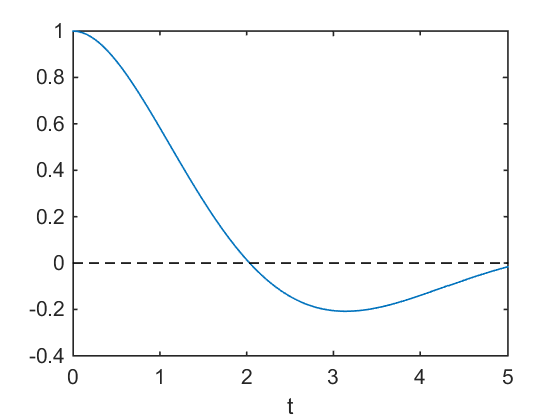

In [27]:
x0 = [1 1]';
Gcl = ss(A-B*K,B,C, 0);

t = linspace(0,5,100);
u = zeros(size(t));

[y, tout] = lsim(Gcl,u,t,x0);
plot(tout,y,tout,zeros(size(tout)),'k--'), xlabel('t')

## 4.2. Controllability

- When can we place the eigenvalues using state feedback?

- When is B matrix (the actuator configuration) rich enough so that we can make the system do whatever we want it to do?

- The answer revolves around the concept of ``controllability``

Given a discrete-time system

$$x_{k+1} = Ax_k + Bu_k$$

We would like to drive this system in $n$ steps to a particular target state $x^{*}$ 

$$
\begin{align*}
x_1 &= Ax_0 + Bu_0 = Bu_0\\
x_2 &= Ax_1 + Bu_1 = ABu_0 + Bu_1\\
x_3 &= Ax_2 + Bu_2 = A^2Bu_0 + ABu_1 + Bu_2\\
&\vdots\\
x_n &= A^{n-1}Bu_0 + \cdots + Bu_{n-1}\\
\end{align*}
$$

We want to solve

$$
\begin{align*}
x^{*} &= 
\left[ {\begin{matrix}
   B & AB & \cdots & A^{n-1}B\\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   u_{n-1} \\
   \vdots \\   
   u_1\\
   u_0
\end{array} } \right] 
\end{align*}
$$

This is possible for any target state if and only if 
$$
\text{rank}\left(\left[ {\begin{matrix}
   B & AB & \cdots & A^{n-1}B\\   
  \end{matrix} } \right]\right) = n
$$

__Example 1__

$$
\dot{x} = 
\left[ {\begin{matrix}
   2 & 0 \\
   1 & 1 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   1 \\
   1 \\   
\end{array} } \right]u  
$$

In [28]:
A = [2 0;
     1 1];
B = [1 1]';     

G = ctrb(A,B)
rank(G)

G =

     1     2
     1     2


ans =

     1

__Example 2__

$$
\dot{x} = 
\left[ {\begin{matrix}
   0 & 1 \\
   0 & 0 \\   
  \end{matrix} } \right]
\left[ {\begin{array}{cc}
   x_1 \\
   x_2 \\   
\end{array} } \right] +
\left[ {\begin{array}{cc}
   0 \\
   1 \\   
\end{array} } \right]u  
$$

In [29]:
A = [0 1;
     0 0];
B = [0 1]';     

G = ctrb(A,B)
rank(G)

G =

     0     1
     1     0


ans =

     2

## 4.3. Observer

- We now know how to design rather effective controllers using state feedback.

- But what about $y$ ?

<img src="./image_files/observer.png" width=350/>

The predictor-corrector ('Luenberger' observer)

$$
\begin{align*}
\dot x &= A x \\
y &= C x
\end{align*}
$$

1) Make a copy of the system
$$\dot{\hat{x}} = A \hat x \quad \text{predictor}$$

2) Add a notion of how wrong your estimate is to the model

$$ \dot{\hat{x}} = A \hat x + \underbrace{L \left(y - C \hat x \right)}_{\text{corrector}} $$

Picking the Observer Gain

- What we want to stabilize (drive to zero) is the _estimation error_, i.e., the difference between the actual state and the estimated state $e = x - \hat x$

$$
\begin{align*}
\dot e &= \dot x - \dot{\hat{x}} = Ax - A \hat x - L \left(y - C \hat x \right)\\
& = A\left( x - \hat x\right) - LC \left(x - \hat x \right) = (A-LC) \; e
\end{align*}
$$

- Just pick $L$ such that the eigenvalues to $A-LC$ have negative real part !!!

$$ \text{Re}\left( \text{eig (A-LC)}\right) < 0$$

- We already know how to do this $\rightarrow$ Pole-placement

<img src="./image_files/observer_block_diagram.png" width=400/>

Does this always work?
- No



## 4.4. Observability

Need to redo what we did for control design to understand when we can recover the state from the output

- Given a discrete time system without inptus

$$
\begin{align*}
x_{k+1} &= Ax_k \\
y_k &= C x_k
\end{align*}
$$

Can we recover the initial condition by collecting $n$ output values?

$$
\begin{align*}
y_0 &= Cx_0 \\
y_1 &= Cx_1 = CAx_0\\
&\;\vdots\\
y_{n-1} &= CA^{n-1}x_0 \\
\end{align*}
$$

The Observability Matrix

$$
\begin{align*}
\left[ {\begin{array}{cc}
   y_{0} \\
   y_1\\
   y_2\\
   \vdots \\   
   y_{n-1}   
\end{array} } \right] = 
\left[ {\begin{array}{cc}
   C \\
   CA\\
   CA^2\\
   \vdots \\   
   CA^{n-1}   
\end{array} } \right] x_0
\end{align*}
$$

The initial condition can be recovered from the outputs when the so-called observability matrix has full rank.

## 4.5. The Separation Principle

Now, how do we put everything together?

<img src="./image_files/final_block_diagram.png" width=450/>

Step 1) Design the stat feedback controller as if we had $x$ (which we don't)

$$
\begin{align*}
u &= -Kx \quad \implies \hat x = (A-BK) x \quad \text{what we design for}\\
u &= -K \hat x \quad \text{what we actually have}
\end{align*}
$$

Step 2) Estimate $x$ using an observer (that now also contains $u$)

$$
\begin{align*}
\dot{\hat{x}} &= A \hat x + Bu + L \left(y - C \hat x \right)\\
&\implies \dot e = (A-LC)\, e
\end{align*}
$$

- Want both $x$ and $e$ to be stabilized

$$
\begin{align*}
\dot x &= Ax-BK \hat x = Ax - BK(x-e) = (A-BK)x + BK e\\
\dot e &= (A-LC)\,e
\end{align*}
$$

or

$$
\begin{bmatrix}
\dot x \\ \dot e
\end{bmatrix}=
\underbrace{\begin{bmatrix}
A-BK & BK \\ 0 & A-LC
\end{bmatrix}}_{M}
\begin{bmatrix}
x \\ e
\end{bmatrix}
$$

This is an (upper) triangular block matrix

$\rightarrow$ Its eigenvalues are given by the eigenvalues of the diagonal blocks!

Design $K$ and $L$ independently to satisfy

$$ \text{Re}\left( \text{eig (A-BK)}\right) < 0, \quad \text{Re}\left( \text{eig (A-LC)}\right) < 0$$

<br>
<img src="./image_files/StateSpace_BlockDiagram.png" width=350/>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>